## Лабораторна робота №3
з дисципліни "Нейронні мережі"
  
студента групи АнД-41
  
Бережного Дмитра

### Варіант № 2

## Завдання

На основі документу вирішити завдання класифікації для набору даних Fashion MNIST.

Для моделювання використати 3 класи індекси яких взяти відповідно до номеру у списку групи у наведеній нижче таблиці.

Моделювання провести із використанням нейронної мережі (Flatten & Dense layers).

Здійснити вибір оптимального кроку градієнтного алгоритму (learning_rate), а також побудову Confusion Matrix.

Результати оформити у вигляді файлу з кодом для моделювання та візуалізації у форматі .ipynb

Результати викласти у репозиторії GitHub (папка Lab3).

Підготуватися до захисту лабораторрної роботи (пояснення коду, відповіді на запитання за темою)
#### Індекси за варіантом: 1,4,8

In [462]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn import metrics
import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam

### Імпорт датасету

In [463]:
(train_data, train_labels), (test_data, test_labels) = fashion_mnist.load_data()

### Розмірність даних

In [464]:
print("Train data shape: ",train_data.shape, ";", "Train labels shape: ",train_labels.shape)
print("Test data shape: ",test_data.shape, ";", "Test labels shape: ",test_labels.shape)

Train data shape:  (60000, 28, 28) ; Train labels shape:  (60000,)
Test data shape:  (10000, 28, 28) ; Test labels shape:  (10000,)


### Номер класів датасету і що вони відображають

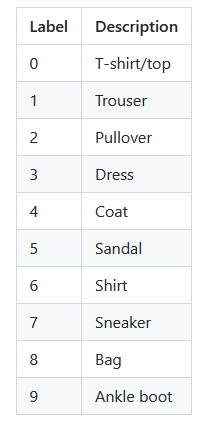

### Виведемо перший зразок у даних

In [465]:
train_data[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   1,
          0,   0,  13,  73,   0,   0,   1,   4,   0,   0,   0,   0,   1,
          1,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
          0,  36, 136, 127,  62,  54,   0,   0,   0,   1,   3,   4,   0,
          0,   3],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   6,
          0, 102, 204, 176, 134, 144, 123,  23,   0,   0,   0,   0,  12,
         10,   0],
       [  

### Візуалізуємо його за допомогою графіка

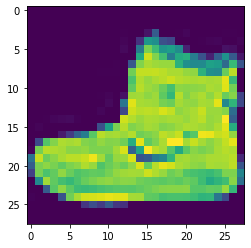

In [466]:
plt.imshow(train_data[0])

### Виведемо номер класу цього зразка

In [467]:
train_labels[0]

9

### Видаляємо з даних всі зразки з класами, які не під номерами 1,4,8

In [468]:
idx = np.argsort(train_labels)
train_data = train_data[idx]
train_labels = train_labels[idx]

idx = np.argsort(test_labels)
test_data = test_data[idx]
test_labels = test_labels[idx]

labels = ["T-Shirt", "Trouser", "Pullover", "Dress", "Coat", 
          "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

label_mapping = dict(zip(labels, range(10)))

def get_data(mapping, classes):
    X_train, X_test, y_train, y_test = [], [], [], []
    for cls in classes:
        idx = mapping[cls]
        start = idx*6000
        end = idx*6000+6000
        X_train.append(train_data[start: end])
        y_train.append(train_labels[start: end])
        start = idx*1000
        end = idx*1000+1000
        X_test.append(test_data[start: end])
        y_test.append(test_labels[start: end])
    return X_train, X_test, y_train, y_test


X_train, X_test, y_train, y_test = get_data(label_mapping, 
                                            classes=["Trouser", "Coat", "Bag"])

### Перетворюємо дані у numpy array

In [469]:
X_train = np.array(X_train)
X_test = np.array(X_test)
y_train = np.array(y_train)
y_test = np.array(y_test)
print( "X_train.shape: ",X_train.shape)
print( "X_train.shape: ",X_test.shape)
print( "X_train.shape: ",y_train.shape)
print( "X_train.shape: ",y_test.shape)

X_train.shape:  (3, 6000, 28, 28)
X_train.shape:  (3, 1000, 28, 28)
X_train.shape:  (3, 6000)
X_train.shape:  (3, 1000)


### Для тренування мережі необхідно за допомогою функції reshape перетворити розмірність даних

In [470]:
X_train = X_train.reshape(18000,784)
X_test = X_test.reshape(3000,784)
y_train = y_train.reshape(18000,1)
y_test = y_test.reshape(3000,1)
print( "X_train.shape: ",X_train.shape)
print( "X_train.shape: ",X_test.shape)
print( "X_train.shape: ",y_train.shape)
print( "X_train.shape: ",y_test.shape)

X_train.shape:  (18000, 784)
X_train.shape:  (3000, 784)
X_train.shape:  (18000, 1)
X_train.shape:  (3000, 1)


### Подивимось на те, як наші класи збалансовані

In [471]:
print("Збалансованість на тренувальній вибірці:")
np.unique(y_train,return_counts=True)

Збалансованість на тренувальній вибірці:


(array([1, 4, 8], dtype=uint8), array([6000, 6000, 6000], dtype=int64))

In [472]:
print("Збалансованість на тестувальній вибірці:")
np.unique(y_test,return_counts=True)

Збалансованість на тестувальній вибірці:


(array([1, 4, 8], dtype=uint8), array([1000, 1000, 1000], dtype=int64))

### Як видно, класи збалансовані рівномірно

##  1) Модель без нормалізації та з лінійною функцією.

In [473]:
# Set random seed
tf.random.set_seed(42)

# Create the model
model = tf.keras.Sequential([
  tf.keras.layers.Dense(1),
  tf.keras.layers.Dense(9, activation="softmax")
])

# Compile the model
model.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                 optimizer=tf.keras.optimizers.Adam(),
                 metrics=["accuracy"])

# Fit the model
history = model.fit(X_train, y_train, epochs=50,validation_data=( X_test, y_test)) 

Epoch 1/50
563/563 [==============================] - 1s 942us/step - loss: 4.5941 - accuracy: 0.5161 - val_loss: 1.2145 - val_accuracy: 0.6980
Epoch 2/50
563/563 [==============================] - 0s 772us/step - loss: 1.1726 - accuracy: 0.7836 - val_loss: 1.0638 - val_accuracy: 0.8003
Epoch 3/50
563/563 [==============================] - 0s 818us/step - loss: 0.9224 - accuracy: 0.8464 - val_loss: 0.8430 - val_accuracy: 0.8903
Epoch 4/50
563/563 [==============================] - 0s 792us/step - loss: 0.7443 - accuracy: 0.8796 - val_loss: 0.8962 - val_accuracy: 0.8903
Epoch 5/50
563/563 [==============================] - 1s 907us/step - loss: 0.6058 - accuracy: 0.8882 - val_loss: 0.6182 - val_accuracy: 0.9210
Epoch 6/50
563/563 [==============================] - 1s 891us/step - loss: 0.5292 - accuracy: 0.9057 - val_loss: 0.4570 - val_accuracy: 0.9177
Epoch 7/50
563/563 [==============================] - 0s 884us/step - loss: 0.3350 - accuracy: 0.9283 - val_loss: 0.3072 - val_accuracy:

### Точність моделі досить висока, проте спробуємо її підвищити, знайшовши ідеальний learning rate

In [474]:
# Set random seed
tf.random.set_seed(42)

# Create the model
model2 = tf.keras.Sequential([
  tf.keras.layers.Dense(1),
  tf.keras.layers.Dense(9, activation="softmax")
])

# Compile the model
model2.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                 optimizer=tf.keras.optimizers.Adam(),
                 metrics=["accuracy"])
lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-3 * 10**(epoch/20))
# traverse a set of learning rate values starting from 1e-4, increasing by 10**(epoch/20) every epoch

# Fit the model
history2 = model2.fit(X_train, y_train, epochs=50,validation_data=( X_test, y_test),callbacks=[lr_scheduler]) 

Epoch 1/50
563/563 [==============================] - 1s 925us/step - loss: 4.5941 - accuracy: 0.5161 - val_loss: 1.2145 - val_accuracy: 0.6980
Epoch 2/50
563/563 [==============================] - 0s 706us/step - loss: 1.1786 - accuracy: 0.7799 - val_loss: 1.3311 - val_accuracy: 0.8527
Epoch 3/50
563/563 [==============================] - 0s 702us/step - loss: 0.9594 - accuracy: 0.8258 - val_loss: 0.9781 - val_accuracy: 0.8723
Epoch 4/50
563/563 [==============================] - 0s 704us/step - loss: 0.7522 - accuracy: 0.8697 - val_loss: 0.7494 - val_accuracy: 0.8987
Epoch 5/50
563/563 [==============================] - 1s 952us/step - loss: 0.5401 - accuracy: 0.8993 - val_loss: 0.5010 - val_accuracy: 0.9130
Epoch 6/50
563/563 [==============================] - 0s 829us/step - loss: 0.3259 - accuracy: 0.9297 - val_loss: 0.2732 - val_accuracy: 0.9383
Epoch 7/50
563/563 [==============================] - 0s 699us/step - loss: 0.2235 - accuracy: 0.9494 - val_loss: 0.2222 - val_accuracy:

### Графік залежності loss від learning rate

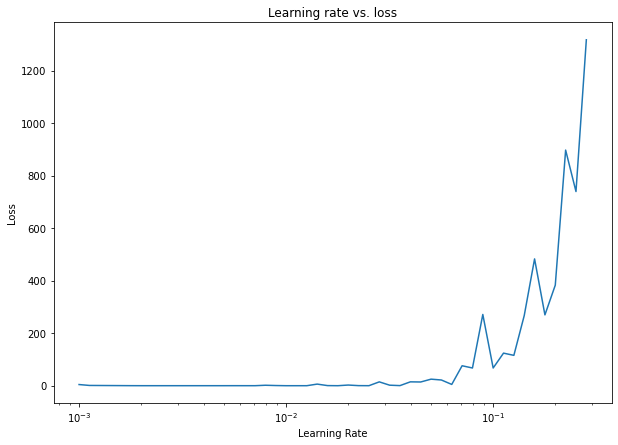

In [475]:
# Plot the learning rate versus the loss
lrs = 1e-3 * (10**(np.arange(50)/20))
plt.figure(figsize=(10, 7))
plt.semilogx(lrs, history2.history["loss"]) # we want the x-axis (learning rate) to be log scale
plt.xlabel("Learning Rate")
plt.ylabel("Loss")
plt.title("Learning rate vs. loss");

### Як видно з графіку, найкращий learning rate знаходиться в межах від 0.001 до 0.01. Спробуємо навчити модель з lr = 0.0055 ((0.0001+0.001)/2)

In [476]:
tf.random.set_seed(42)

# Create the model
model3 = tf.keras.Sequential([
  tf.keras.layers.Dense(1),
  tf.keras.layers.Dense(9, activation="softmax")
])

# Compile the model
model3.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                 optimizer=tf.keras.optimizers.Adam(learning_rate = 0.0055),
                 metrics=["accuracy"])

# Fit the model
history3 = model3.fit(X_train, y_train, epochs=50,validation_data=( X_test, y_test)) 

Epoch 1/50
563/563 [==============================] - 1s 925us/step - loss: 4.0147 - accuracy: 0.6891 - val_loss: 1.3731 - val_accuracy: 0.7323
Epoch 2/50
563/563 [==============================] - 0s 706us/step - loss: 0.8176 - accuracy: 0.8676 - val_loss: 0.4642 - val_accuracy: 0.9317
Epoch 3/50
563/563 [==============================] - 0s 697us/step - loss: 0.2727 - accuracy: 0.9396 - val_loss: 0.2439 - val_accuracy: 0.9457
Epoch 4/50
563/563 [==============================] - 0s 699us/step - loss: 0.1973 - accuracy: 0.9534 - val_loss: 0.2709 - val_accuracy: 0.9417
Epoch 5/50
563/563 [==============================] - 0s 699us/step - loss: 0.1968 - accuracy: 0.9531 - val_loss: 0.2321 - val_accuracy: 0.9453
Epoch 6/50
563/563 [==============================] - 0s 696us/step - loss: 0.2015 - accuracy: 0.9499 - val_loss: 0.2590 - val_accuracy: 0.9347
Epoch 7/50
563/563 [==============================] - 0s 705us/step - loss: 0.2023 - accuracy: 0.9500 - val_loss: 0.1935 - val_accuracy:

### На останній епосі, результати стали гірше, ніж з lr за замовчуванням, адже точність між тестовою і тренувальною вибіркою сильно відрізняється .

## Побудова прогнозу та confusion matrix. Прогноз будемо будувати за першою моделю, адже вона найкраща.

In [477]:
y_prob = model.predict(X_test)
y_prob

array([[1.8079709e-07, 9.6340340e-01, 4.8023310e-07, ..., 9.3755028e-07,
        1.8647431e-07, 2.8949521e-02],
       [1.8207834e-07, 9.5834571e-01, 4.8566358e-07, ..., 9.5009091e-07,
        1.8783089e-07, 3.6017619e-02],
       [1.6650816e-07, 9.5103371e-01, 4.3198236e-07, ..., 8.3370236e-07,
        1.7155662e-07, 8.1079016e-03],
       ...,
       [4.0910292e-10, 1.2431797e-03, 1.3148247e-09, ..., 2.8173692e-09,
        4.2554091e-10, 9.9875677e-01],
       [9.9125297e-10, 3.1720919e-03, 3.1303817e-09, ..., 6.6504438e-09,
        1.0302762e-09, 9.9682790e-01],
       [1.4419809e-09, 4.7168462e-03, 4.5199999e-09, ..., 9.5678176e-09,
        1.4982564e-09, 9.9528307e-01]], dtype=float32)

### Прогноз

In [478]:
y_hat = y_prob.argmax(axis=1)
y_hat[20:]

array([1, 1, 1, ..., 8, 8, 8], dtype=int64)

### Confusion matrix

In [479]:
conf_matrix=metrics.confusion_matrix(y_test,y_hat)
conf_matrix = pd.DataFrame(conf_matrix, index=['Trouser','Coat','Bag'], columns=['Trouser','Coat','Bag'])
conf_matrix

,Trouser,Coat,Bag
Trouser,973,10,17
Coat,68,927,5
Bag,33,7,960


### Як видно, з 1000 зразків Trouser правильно класифіковано - 973, Coat - 927, Bag - 960.

# 2) Модель з ReLu функцією та нормалізацією.

In [480]:
X_train.min(), X_train.max()

(0, 255)

### Нормалізація іксів

In [481]:
X_train_norm = X_train / 255.0
X_test_norm = X_test / 255.0

### Тренування

In [482]:
# Set random seed
tf.random.set_seed(42)

model4 = tf.keras.Sequential([
  tf.keras.layers.Dense(1,activation="relu"),
  tf.keras.layers.Dense(9, activation="softmax")
])

    
# Compile the model
model4.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                 optimizer=tf.keras.optimizers.Adam(),
                 metrics=["accuracy"])
 
history4 = model4.fit(X_train_norm, y_train, epochs=50,validation_data=(X_test_norm, y_test)) 


Epoch 1/50
563/563 [==============================] - 1s 948us/step - loss: 1.8981 - accuracy: 0.3354 - val_loss: 1.6586 - val_accuracy: 0.3333
Epoch 2/50
563/563 [==============================] - 0s 696us/step - loss: 1.5140 - accuracy: 0.3333 - val_loss: 1.4014 - val_accuracy: 0.3333
Epoch 3/50
563/563 [==============================] - 0s 705us/step - loss: 1.3334 - accuracy: 0.3324 - val_loss: 1.2792 - val_accuracy: 0.3333
Epoch 4/50
563/563 [==============================] - 0s 681us/step - loss: 1.2444 - accuracy: 0.3259 - val_loss: 1.2156 - val_accuracy: 0.3333
Epoch 5/50
563/563 [==============================] - 0s 681us/step - loss: 1.1960 - accuracy: 0.3291 - val_loss: 1.1793 - val_accuracy: 0.3333
Epoch 6/50
563/563 [==============================] - 0s 706us/step - loss: 1.1673 - accuracy: 0.3320 - val_loss: 1.1568 - val_accuracy: 0.3333
Epoch 7/50
563/563 [==============================] - 0s 676us/step - loss: 1.1490 - accuracy: 0.3239 - val_loss: 1.1419 - val_accuracy:

### Як видно, точність моделі погана, спробуємо знайти підходящий learning rate.

In [483]:
tf.random.set_seed(42)

model5 = tf.keras.Sequential([
  tf.keras.layers.Dense(1,activation="relu"),
  tf.keras.layers.Dense(9, activation="softmax")
])

    
# Compile the model
model5.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                 optimizer=tf.keras.optimizers.Adam(),
                 metrics=["accuracy"])
lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-3 * 10**(epoch/20)) 
history5 = model5.fit(X_train_norm, y_train, epochs=50,validation_data=(X_test_norm, y_test),callbacks=[lr_scheduler]) 

Epoch 1/50
563/563 [==============================] - 1s 981us/step - loss: 1.8981 - accuracy: 0.3354 - val_loss: 1.6586 - val_accuracy: 0.3333
Epoch 2/50
563/563 [==============================] - 0s 733us/step - loss: 1.5014 - accuracy: 0.3333 - val_loss: 1.3829 - val_accuracy: 0.3333
Epoch 3/50
563/563 [==============================] - 0s 749us/step - loss: 1.3093 - accuracy: 0.3293 - val_loss: 1.2537 - val_accuracy: 0.3333
Epoch 4/50
563/563 [==============================] - 0s 767us/step - loss: 1.2179 - accuracy: 0.3252 - val_loss: 1.1899 - val_accuracy: 0.3333
Epoch 5/50
563/563 [==============================] - 1s 911us/step - loss: 1.1710 - accuracy: 0.3286 - val_loss: 1.1558 - val_accuracy: 0.3333
Epoch 6/50
563/563 [==============================] - 1s 953us/step - loss: 1.1450 - accuracy: 0.3347 - val_loss: 1.1360 - val_accuracy: 0.3333
Epoch 7/50
563/563 [==============================] - 0s 673us/step - loss: 1.1295 - accuracy: 0.3258 - val_loss: 1.1238 - val_accuracy:

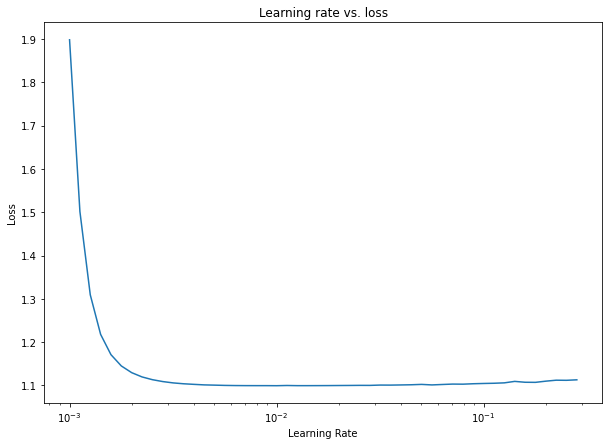

In [484]:
# Plot the learning rate versus the loss
lrs = 1e-3 * (10**(np.arange(50)/20))
plt.figure(figsize=(10, 7))
plt.semilogx(lrs, history5.history["loss"]) # we want the x-axis (learning rate) to be log scale
plt.xlabel("Learning Rate")
plt.ylabel("Loss")
plt.title("Learning rate vs. loss");

### Як видно з графіку і з результатів моделі, найкращий lr - за замовчуванням.Оскільки точність моделі ніяк не змінюється з кожною епохою, то спробуємо змінити архітектуру мережі.

In [485]:
tf.random.set_seed(42)

model6 = tf.keras.Sequential([
  tf.keras.layers.Dense(10,activation="relu"),
  tf.keras.layers.Dense(10,activation="relu"),  
  tf.keras.layers.Dense(4,activation="relu"),
  tf.keras.layers.Dense(9, activation="softmax")
])

    
# Compile the model
model6.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                 optimizer=tf.keras.optimizers.Adam(),
                 metrics=["accuracy"])
# Fit the model
history6 = model6.fit(X_train_norm, y_train, epochs=50,validation_data=( X_test_norm, y_test)) 

Epoch 1/50
563/563 [==============================] - 1s 1ms/step - loss: 0.8928 - accuracy: 0.8638 - val_loss: 0.5475 - val_accuracy: 0.9800
Epoch 2/50
563/563 [==============================] - 0s 870us/step - loss: 0.4405 - accuracy: 0.9823 - val_loss: 0.3457 - val_accuracy: 0.9847
Epoch 3/50
563/563 [==============================] - 0s 868us/step - loss: 0.2550 - accuracy: 0.9844 - val_loss: 0.1089 - val_accuracy: 0.9827
Epoch 4/50
563/563 [==============================] - 0s 878us/step - loss: 0.0708 - accuracy: 0.9863 - val_loss: 0.0902 - val_accuracy: 0.9820
Epoch 5/50
563/563 [==============================] - 0s 855us/step - loss: 0.0526 - accuracy: 0.9882 - val_loss: 0.0531 - val_accuracy: 0.9860
Epoch 6/50
563/563 [==============================] - 0s 870us/step - loss: 0.0443 - accuracy: 0.9896 - val_loss: 0.0477 - val_accuracy: 0.9873
Epoch 7/50
563/563 [==============================] - 0s 864us/step - loss: 0.0386 - accuracy: 0.9899 - val_loss: 0.0434 - val_accuracy: 0

### Як видно, точність майже стовідсоткова.

### Прогноз тa Confusion matrix

In [486]:
y_prob = model6.predict(X_test_norm)
y_hat = y_prob.argmax(axis=1)
conf_matrix=metrics.confusion_matrix(y_test,y_hat)
conf_matrix = pd.DataFrame(conf_matrix, index=['Trouser','Coat','Bag'], columns=['Trouser','Coat','Bag'])
conf_matrix

,Trouser,Coat,Bag
Trouser,990,6,4
Coat,1,992,7
Bag,2,9,989


### Як видно, з 1000 зразків Trouser правильно класифіковано - 990, Coat - 992, Bag - 989.

# Висновки
В результаті виконання даної лабораторної була проведена класифікація за домомогою нейронних мереж. Найкращою виявилася модель з активаційною функцією ReLu та нормалізованими даними з кроком навчання, який задається по дефолту.